In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path_ongevallen = "C:\\Users\\xyria\\Documents\\Master TIL\\Q1\\Programmeren\\Groepsproject\\ongevallen.txt"
file_path_wegvakken = "C:\\Users\\xyria\\Documents\\Master TIL\\Q1\\Programmeren\\Groepsproject\\wegvakken.txt"

df_ong = pd.read_csv(file_path_ongevallen, delimiter=',', encoding='utf-8', low_memory=False)
df_weg = pd.read_csv(file_path_wegvakken, delimiter=',', encoding='utf-8', low_memory=False)

merged_df = pd.merge(df_weg, df_ong, left_on='WVK_ID', right_on='WVK_ID', how='outer')


In [2]:
print("Merged DataFrame columns:", merged_df.columns.tolist())

Merged DataFrame columns: ['WVK_ID', 'WVK_BEGDAT', 'WVK_ENDDAT', 'JTE_ID_BEG', 'JTE_ID_END', 'WEGBEHSRT', 'WEGNUMMER', 'WEGDEELLTR', 'HECTOLTTR', 'BST_CODE', 'RPE_CODE', 'RIJRICHTNG', 'STT_TYPE', 'STT_NAAM', 'WPSNAAM', 'GME_ID_x', 'GME_NAAM_x', 'HNRSTRLNKS', 'HNRSTRRHTS', 'E_HNR_LNKS', 'E_HNR_RHTS', 'L_HNR_LNKS', 'L_HNR_RHTS', 'KLOK_BEG', 'KLOK_END', 'SLE_TYPE', 'SLE_NUMMER', 'FK_VELD1', 'FK_VELD5_x', 'ROUTELTR', 'ROUTENR', 'ROUTELTR2', 'ROUTENR2', 'ROUTELTR3', 'ROUTENR3', 'ROUTELTR4', 'ROUTENR4', 'WEGNR_HMP', 'VKL_NUMMER', 'REGNUMMER', 'PVOPGEM', 'DATUM_VKL', 'DAG_CODE', 'MND_NUMMER', 'JAAR_VKL', 'TIJDSTIP', 'UUR', 'DDL_ID', 'AP3_CODE', 'AP4_CODE', 'AP5_CODE', 'ANTL_SLA', 'ANTL_DOD', 'ANTL_GZH', 'ANTL_SEH', 'ANTL_GOV', 'ANTL_PTJ', 'ANTL_TDT', 'MNE_CODE', 'AOL_ID', 'NIVEAUKOP', 'WSE_ID', 'WSE_AN', 'BEBKOM', 'MAXSNELHD', 'WVL_ID', 'WVG_ID', 'WVG_AN', 'WDK_ID', 'WDK_AN', 'LGD_ID', 'ZAD_ID', 'WGD_CODE_1', 'WGD_CODE_2', 'BZD_ID_VM1', 'BZD_ID_VM2', 'BZD_ID_VM3', 'BZD_VM_AN', 'BZD_ID_IF1', '

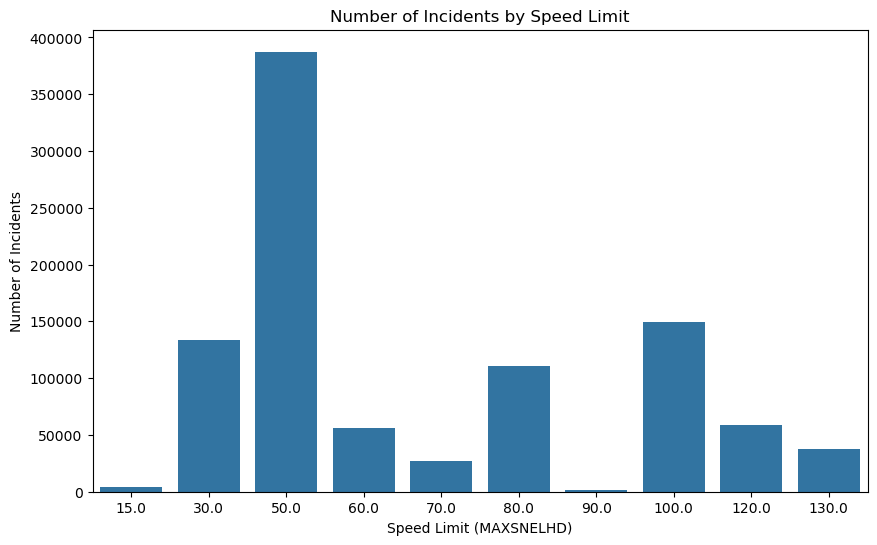

In [3]:
# Totale ongelukken van de afgelopen 10 jaar per snelheidslimiet

plt.figure(figsize=(10, 6))
sns.countplot(x='MAXSNELHD', data=merged_df)
plt.title('Number of Incidents by Speed Limit')
plt.xlabel('Speed Limit (MAXSNELHD)')
plt.ylabel('Number of Incidents')

plt.show()

In [7]:
rural_df = merged_df[merged_df['GME_NAAM_x'].isin([
    "Dinkelland", "Schouwen-Duiveland", "De Fryske Marren",
    "Tubbergen", "Hollands Kroon", "Hulst", "Opsterland",
    "Dronten", "Staphorst", "Bergen (L.)", "Bronckhorst",
    "Coevorden", "Noardeast-Fryslân", "Weststellingwerf",
    "Ooststellingwerf", "Alphen-Chaam", "De Wolden",
    "Noordoostpolder", "Ommen", "Het Hogeland",
    "Midden-Drenthe", "Zeewolde", "Westerwolde",
    "Borger-Odoorn", "Aa en Hunze", "Baarle-Nassau",
    "Noord-Beveland", "Texel", "Sluis", "Westerveld",
    "Ameland", "Rozendaal", "Terschelling", "Vlieland",
    "Schiermonnikoog"
])]

urban_df = merged_df[merged_df['GME_NAAM_x'].isin(["s-Gravenhage", "Leiden", "Haarlem"])]

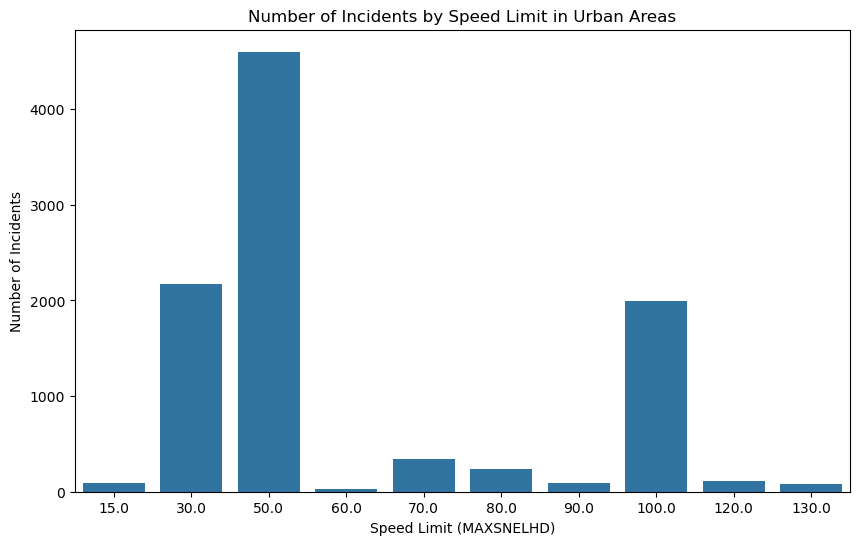

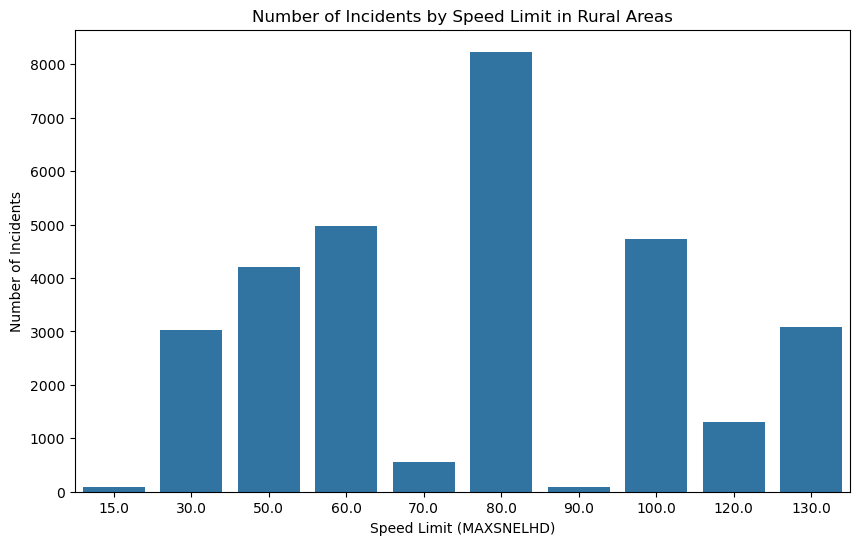

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MAXSNELHD', data=urban_df)
plt.title('Number of Incidents by Speed Limit in Urban Areas')
plt.xlabel('Speed Limit (MAXSNELHD)')
plt.ylabel('Number of Incidents')

plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='MAXSNELHD', data=rural_df)
plt.title('Number of Incidents by Speed Limit in Rural Areas')
plt.xlabel('Speed Limit (MAXSNELHD)')
plt.ylabel('Number of Incidents')

plt.show()

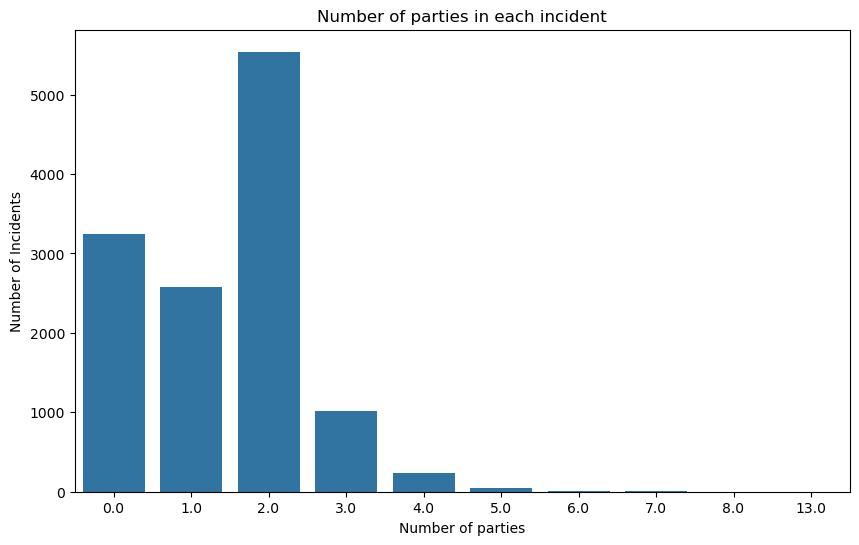

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ANTL_PTJ', data=urban_df)
plt.title('Number of parties in each incident')
plt.xlabel('Number of parties')
plt.ylabel('Number of Incidents')

plt.show()

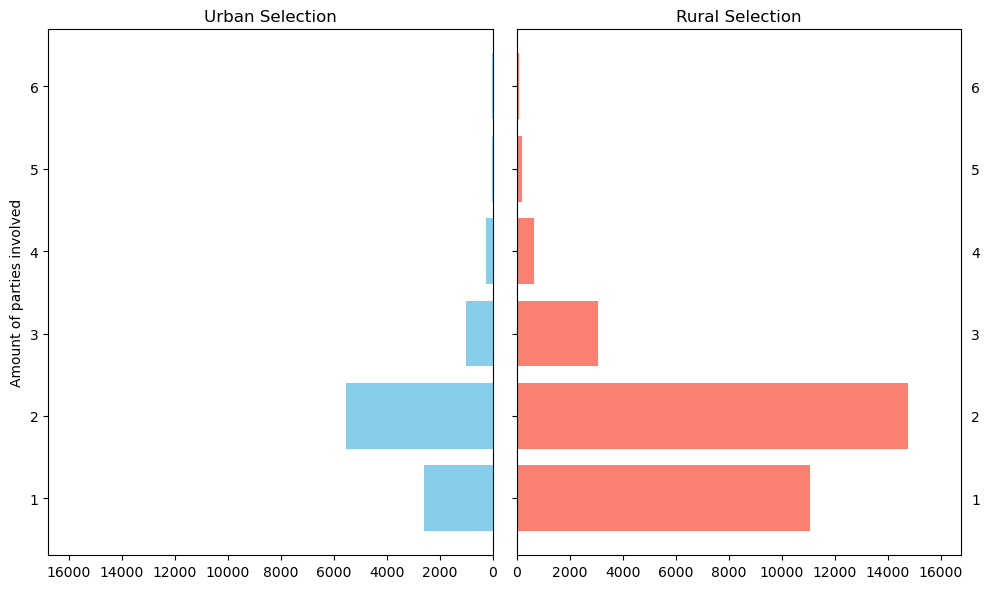

In [26]:
# Stedelijk v landelijk: aantal ongelukken gesorteerd op aantal deelnemende partijen.

urban_counts = urban_df['ANTL_PTJ'].value_counts().sort_index()
rural_counts = rural_df['ANTL_PTJ'].value_counts().sort_index()

categories = range(1, 7)
urban_counts = urban_counts.reindex(categories, fill_value=0)
rural_counts = rural_counts.reindex(categories, fill_value=0)

max_count = max(urban_counts.max(), rural_counts.max())
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

ax1.set_xlim(0, max_count + 2000) 
ax1.barh(urban_counts.index, urban_counts.values, color='skyblue')
ax1.set(title='Urban Selection', ylabel='Amount of parties involved')
ax1.invert_xaxis()  # Now invert the x-axis to mirror the chart for urban_df

ax2.barh(rural_counts.index, rural_counts.values, color='salmon')
ax2.set(title='Rural Selection')
ax2.set_xlim(0, max_count + 2000)  # Ensure both have the same x-axis limits

ax2.yaxis.set_tick_params(labelright=True)
ax2.yaxis.set_tick_params(labelleft=False)

plt.tight_layout()
plt.show()

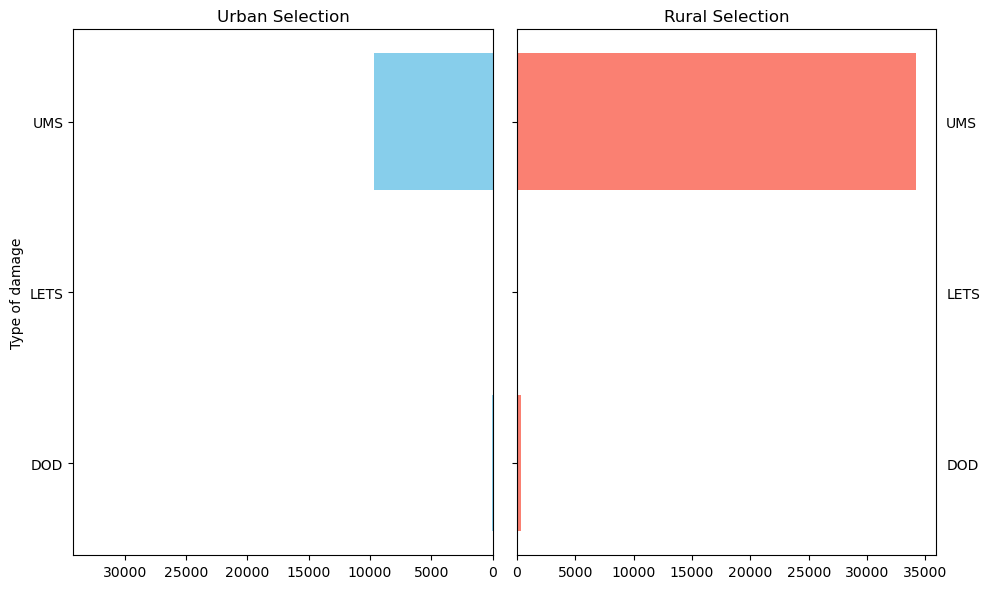

In [25]:
#Stedelijk vs landelijk: ongelukken gesorteerd op letseltype. Bovenste is blikschade (nog aan werken - dit is raar)

urban_counts = urban_df['AP3_CODE'].value_counts().sort_index()
rural_counts = rural_df['AP3_CODE'].value_counts().sort_index()

categories = ("DOD", "LETS", "UMS")
urban_counts = urban_counts.reindex(categories, fill_value=0)
rural_counts = rural_counts.reindex(categories, fill_value=0)

max_count = max(urban_counts.max(), rural_counts.max())
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

ax1.set_xlim(0, max_count)
ax1.barh(urban_counts.index, urban_counts.values, color='skyblue')
ax1.invert_xaxis()  # Mirror the chart for urban_df
ax1.set(title='Urban Selection', ylabel='Type of damage')

ax2.barh(rural_counts.index, rural_counts.values, color='salmon')
ax2.set(title='Rural Selection')

ax2.yaxis.set_tick_params(labelright=True)
ax2.yaxis.set_tick_params(labelleft=False)

plt.tight_layout()
plt.show()

In [29]:
urban_bk = urban_df[urban_df['BEBKOM'].isin(["BI"])] # alle incidenten binnen de bebouwde kom in stedelijke gebieden
urban_buiten_bk = urban_df[urban_df['BEBKOM'].isin(["BU"])]# alle incidenten buiten de bebouwde kom in stedelijke gebieden

rural_bk = rural_df[rural_df['BEBKOM'].isin(["BI"])] # alle incidenten binnen de bebouwde kom in stedelijke gebieden
rural_buiten_bk = rural_df[rural_df['BEBKOM'].isin(["BU"])]# alle incidenten buiten de bebouwde kom in stedelijke gebieden



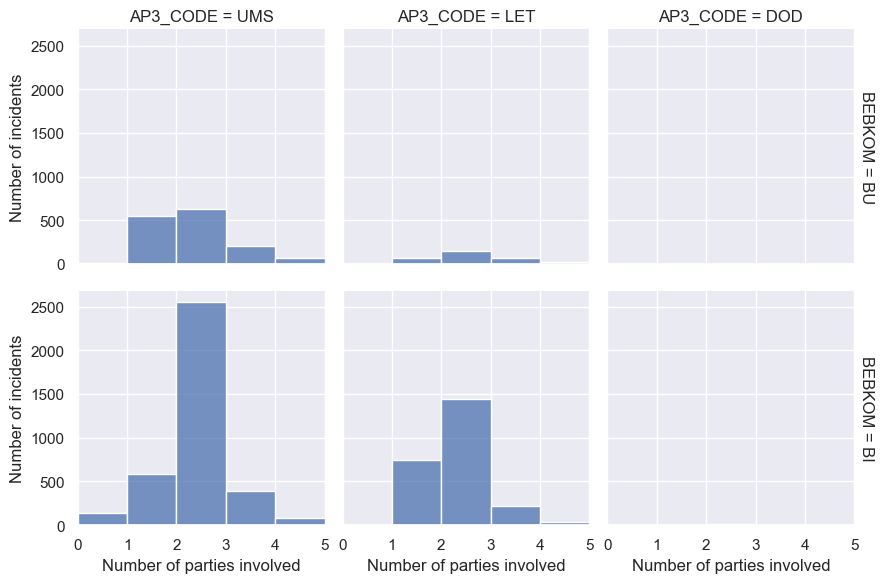

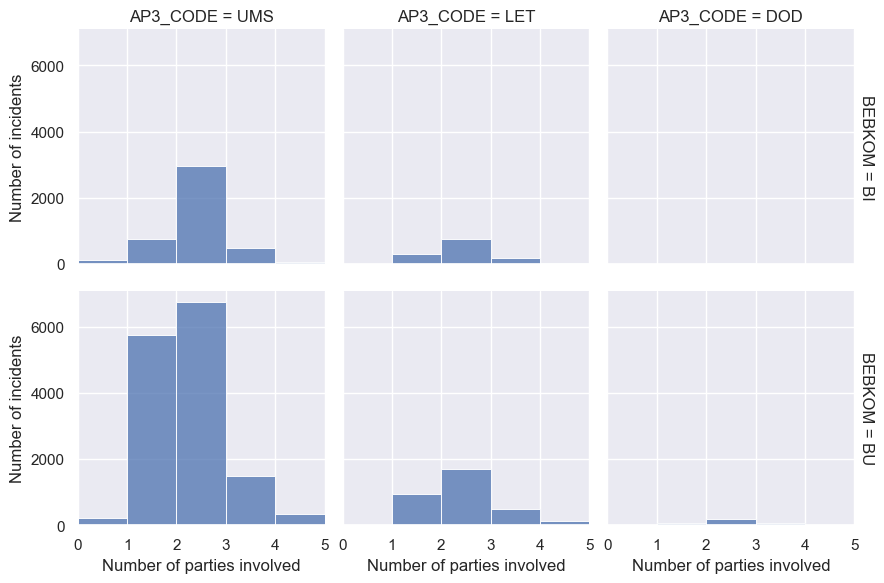

In [41]:
import seaborn as sns
# In stedelijk en landelijk gebied: hoeveelheid ongelukken.
# X-as: aantal partijen. y-as: hoeveelheid. rij: soort letsel.
# Bovenste is buiten bebouwde kom, onderste is binnen de bebouwde kom.
sns.set_theme(style="darkgrid") 
g = sns.displot(
    urban_df, x='ANTL_PTJ', col='AP3_CODE', row='BEBKOM',
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

sns.set_theme(style="darkgrid")
h = sns.displot(
    rural_df, x='ANTL_PTJ', col='AP3_CODE', row='BEBKOM',
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

g.set_axis_labels("Number of parties involved", "Number of incidents")
h.set_axis_labels("Number of parties involved", "Number of incidents")

g.set(xlim=(0, 5))
h.set(xlim=(0, 5))


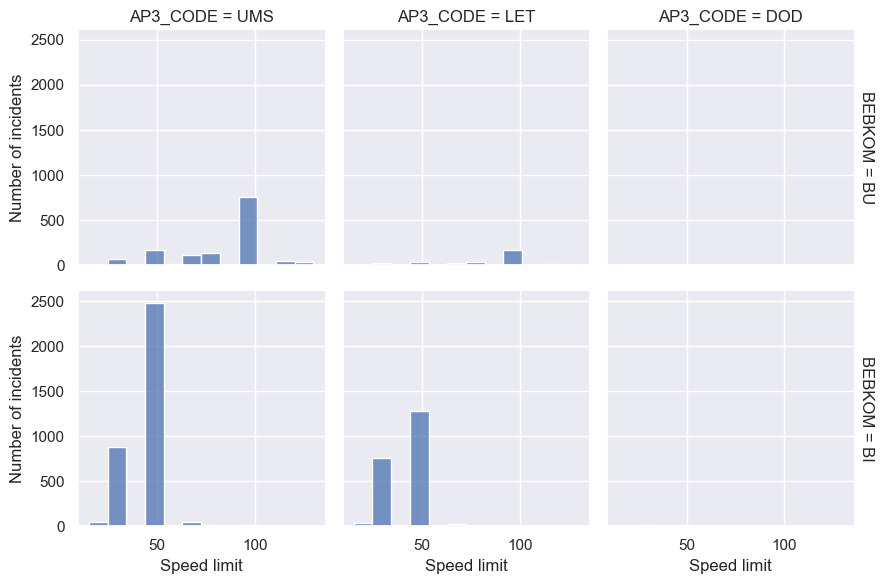

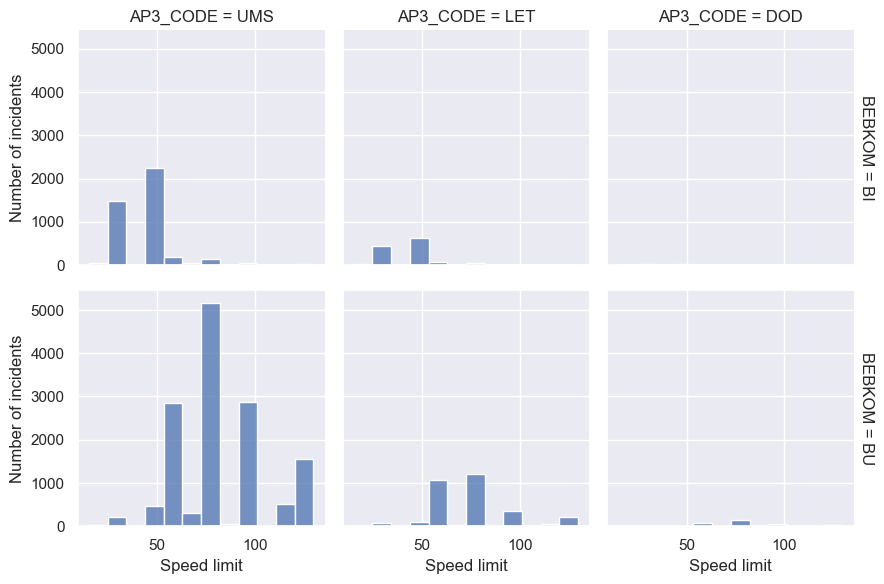

In [51]:
import seaborn as sns
# In stedelijk en landelijk gebied: hoeveelheid ongelukken.
# X-as: snelheidslimiet. y-as: hoeveelheid. rij: soort letsel.
# Bovenste is buiten bebouwde kom, onderste is binnen.

sns.set_theme(style="darkgrid") 
g = sns.displot(
    urban_df, x='MAXSNELHD', col='AP3_CODE', row='BEBKOM',
    binwidth=10, height=3, facet_kws=dict(margin_titles=True),
)

sns.set_theme(style="darkgrid")
h = sns.displot(
    rural_df, x='MAXSNELHD', col='AP3_CODE', row='BEBKOM',
    binwidth=10, height=3, facet_kws=dict(margin_titles=True),
)

g.set_axis_labels("Speed limit", "Number of incidents")
h.set_axis_labels("Speed limit", "Number of incidents")


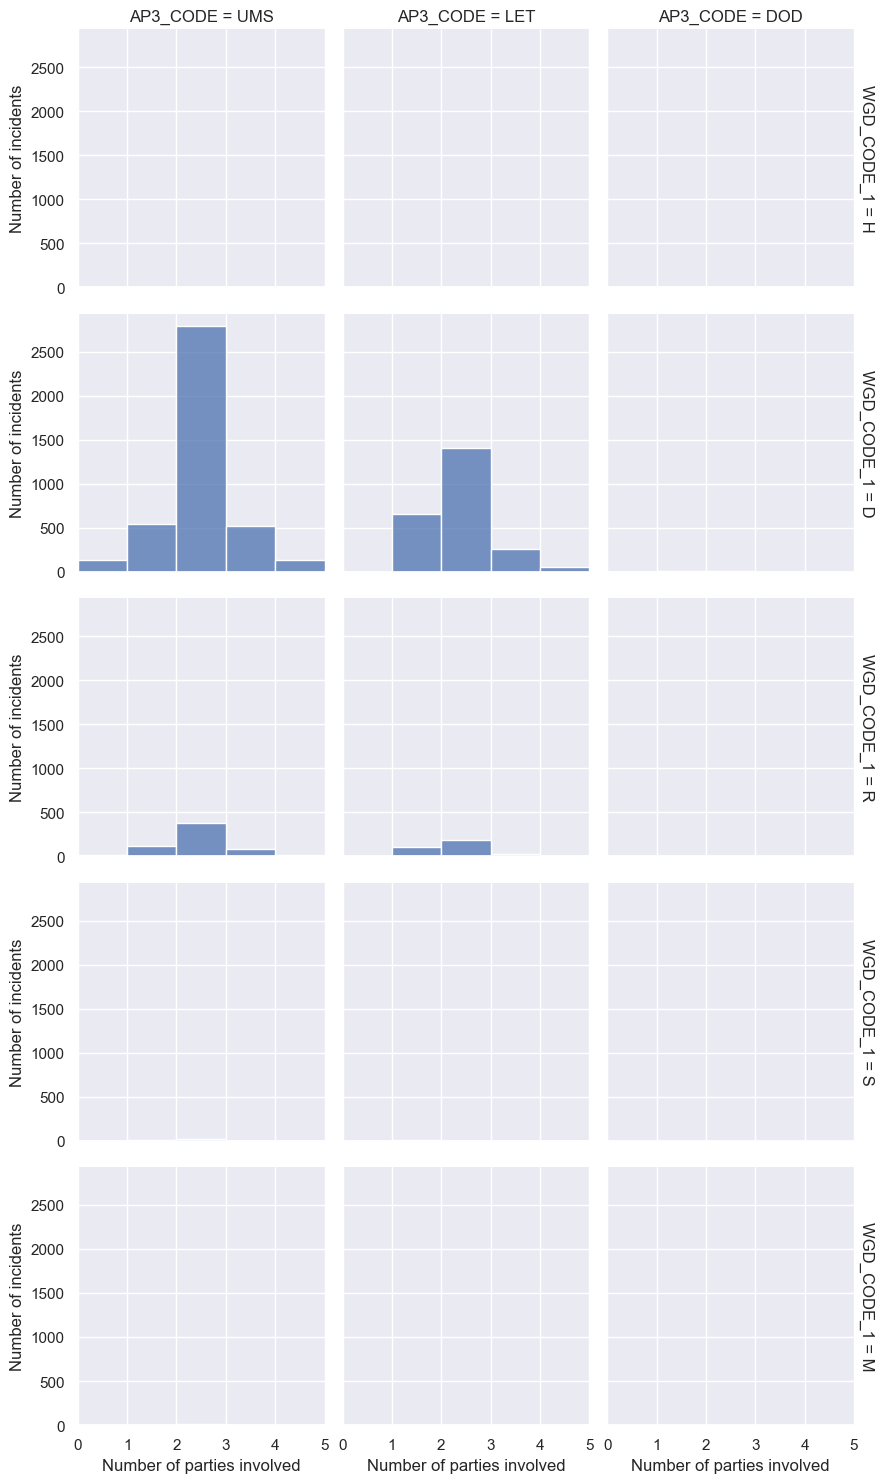

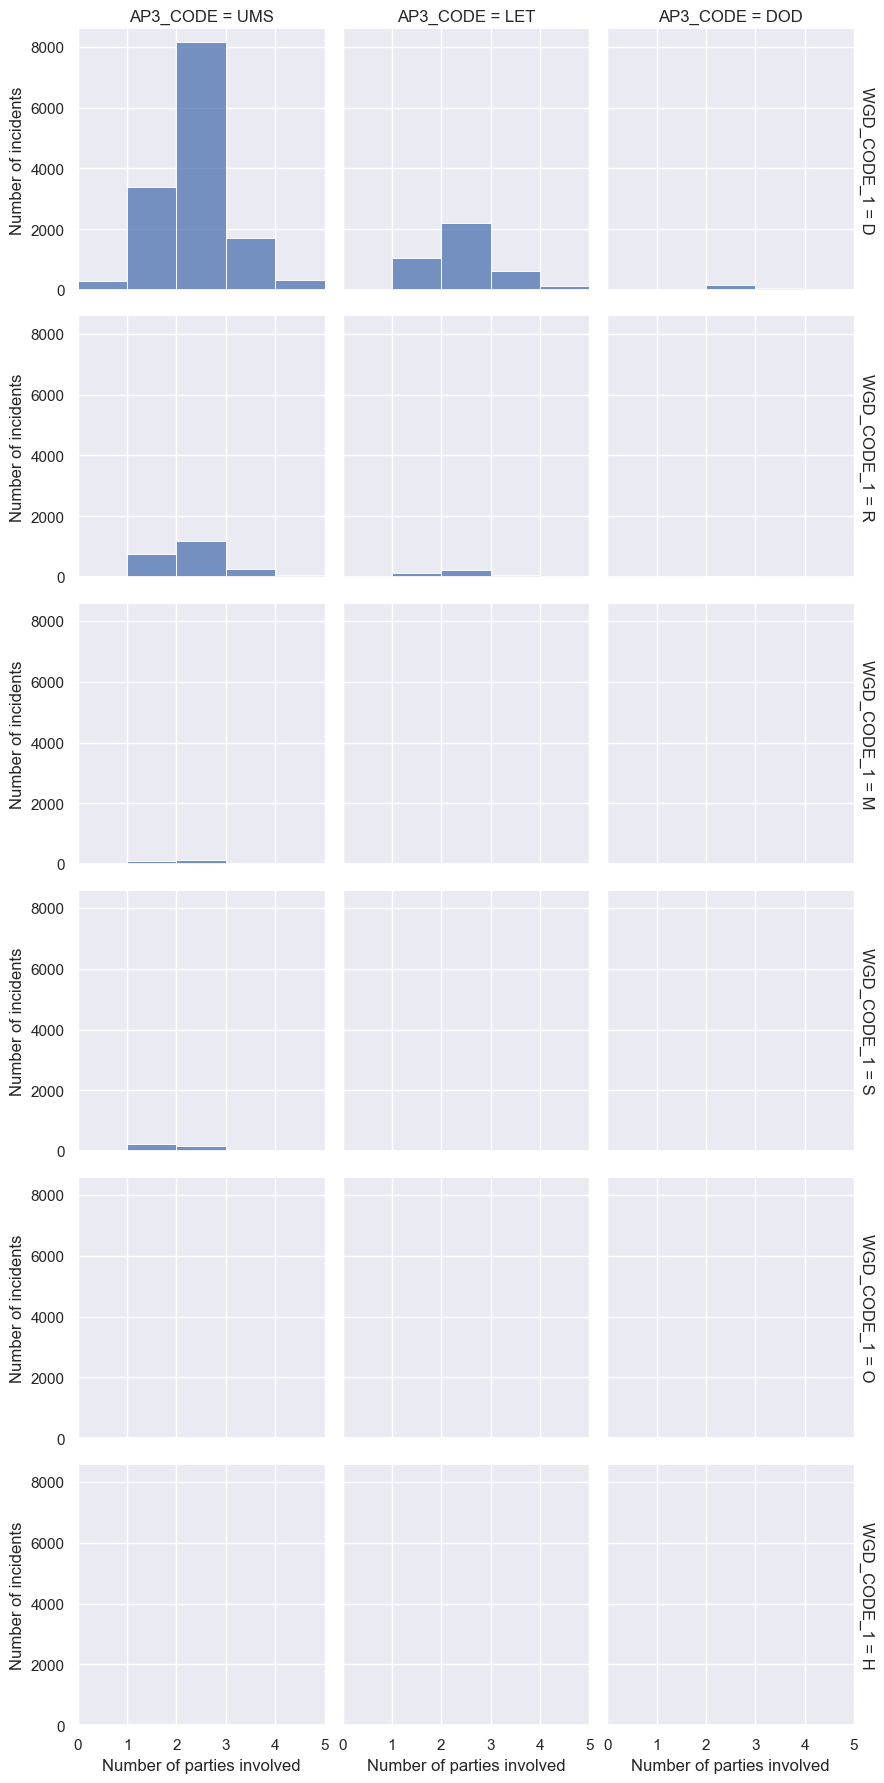

In [54]:
# In stedelijk gebied en landelijk gebied: hoeveelheid ongelukken.
# X-as: aantal partijen. y-as: hoeveelheid. rij: soort letsel.
# Rijen zijn weertypes: alleen rijen 2 (Droog) en 3 (Regen) meenemen in rapport.

sns.set_theme(style="darkgrid") 
g = sns.displot(
    urban_df, x='ANTL_PTJ', col='AP3_CODE', row='WGD_CODE_1',
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

sns.set_theme(style="darkgrid")
h = sns.displot(
    rural_df, x='ANTL_PTJ', col='AP3_CODE', row='WGD_CODE_1',
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

g.set_axis_labels("Number of parties involved", "Number of incidents")
h.set_axis_labels("Number of parties involved", "Number of incidents")

g.set(xlim=(0, 5))
h.set(xlim=(0, 5))

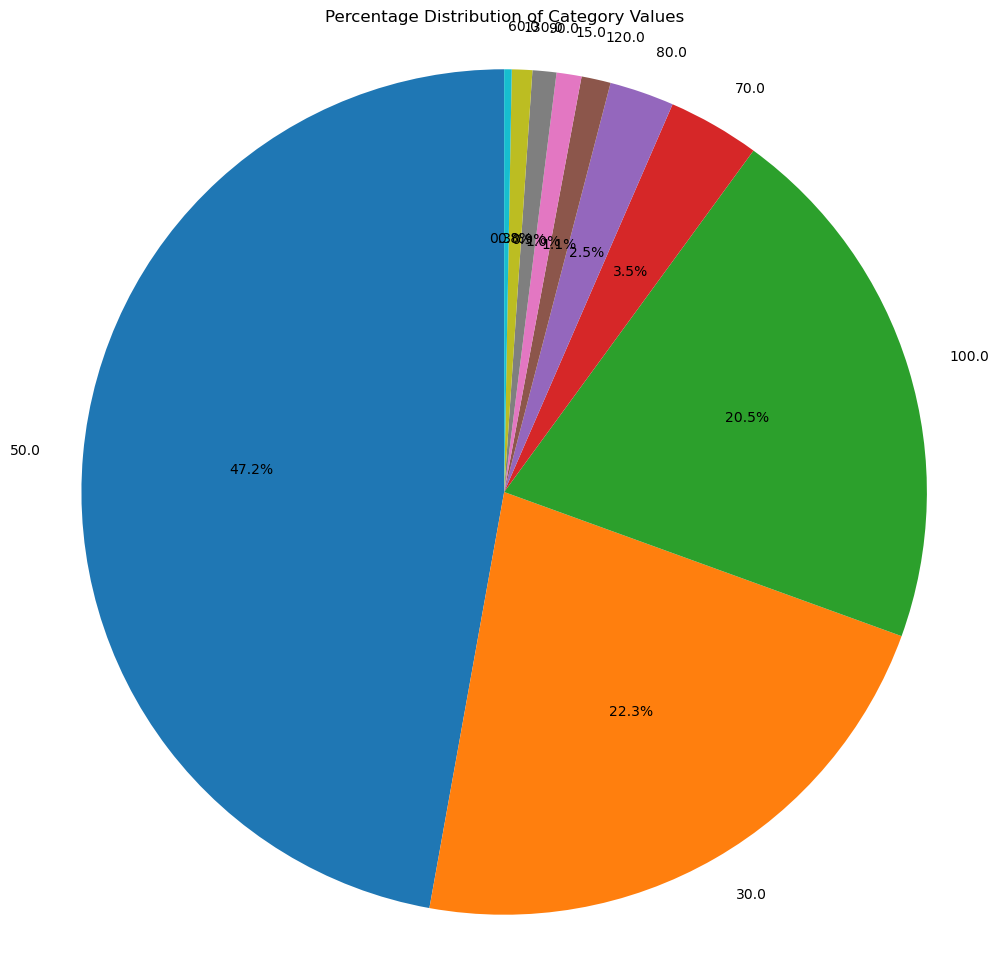

In [5]:
incident_counts = urban_df['MAXSNELHD'].value_counts()
incident_percentages = incident_counts / incident_counts.sum() * 100

plt.figure(figsize=(12,12))  # Set figure size for better clarity
plt.pie(incident_percentages, labels=incident_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Category Values')
plt.axis('equal')

plt.show()
